In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import logging
import keras
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

In [2]:
celsius_q    = np.array([-40, -10,  0,  8, 15, 22,  38],  dtype=float)
fahrenheit_a = np.array([-40,  14, 32, 46, 59, 72, 100],  dtype=float)

for i,c in enumerate(celsius_q):
  print("{} degrees Celsius = {} degrees Fahrenheit".format(c, fahrenheit_a[i]))

-40.0 degrees Celsius = -40.0 degrees Fahrenheit
-10.0 degrees Celsius = 14.0 degrees Fahrenheit
0.0 degrees Celsius = 32.0 degrees Fahrenheit
8.0 degrees Celsius = 46.0 degrees Fahrenheit
15.0 degrees Celsius = 59.0 degrees Fahrenheit
22.0 degrees Celsius = 72.0 degrees Fahrenheit
38.0 degrees Celsius = 100.0 degrees Fahrenheit


In [3]:
# Create dense network, one layer, one neuron
# input_shape --> No. layers
# units --> No. neurons in layer
l0 = tf.keras.layers.Dense(units=1, input_shape=[1])

# Assemple layers into the model
model = tf.keras.Sequential([l0])  # Generaly l0 is embeded here

2022-06-22 12:08:36.607569: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-06-22 12:08:36.607823: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-06-22 12:08:36.610367: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [4]:
# Compile the model, with loss and optimizer functions (training)

# loss function: A way of measuring how far off predictions are from the desired outcome
# Optimizer: A way of adjusting internal values in order to reduce the loss
model.compile(loss='mean_squared_error',
              optimizer=tf.keras.optimizers.Adam(0.1))  #.SGD(), AdaptiveGradientAlgorithm
# Adam: extension of stochastic gradient descent
# learning rate: 0.1 -->  step size taken when adjusting values in the model. Usual range [0.001 - 0.1]
#   lr small --> many iterations to train the model 
#   lr large --> less accurate 
     
# training: calcular el loss & mejorarlo

In [5]:
# Train the model

history = model.fit(celsius_q, fahrenheit_a, epochs=500, verbose=False)

# Initial weights set randomly
# epochs: How many times the cycle loss <--> optimize weights will be run

2022-06-22 12:08:36.697956: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2022-06-22 12:08:36.698260: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2303995000 Hz


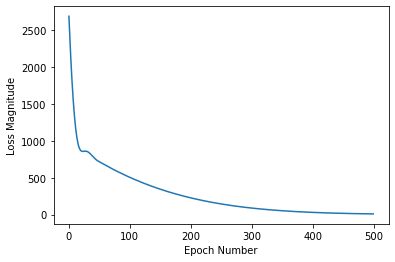

In [6]:
# Display training statistics
plt.xlabel('Epoch Number')
plt.ylabel("Loss Magnitude")
plt.plot(history.history['loss'])

In [7]:
# Prediccion de valores
oC = 100
print('100 oC * 1.8 + 32 = ', (oC*1.8)+32, 'oF') 
print('According to the model:')
print( oC, 'oC = ', model.predict([oC]), 'oF')
print(type(model.predict([oC])))

100 oC * 1.8 + 32 =  212.0 oF
According to the model:
100 oC =  [[211.3255]] oF
<class 'numpy.ndarray'>


### To review


*   We created a model with a Dense layer
*   We trained it with 3500 examples (7 pairs, over 500 epochs).

Our model tuned the variables (weights) in the Dense layer until it was able to return the correct Fahrenheit value for any Celsius value.

## Looking at the layer weights

Finally, let's print the internal variables of the Dense layer. 

In [8]:
print("These are the layer variables: {}".format(l0.get_weights()))
# [1.8223164]
# [29.093859]

These are the layer variables: [array([[1.8223164]], dtype=float32), array([29.093859], dtype=float32)]


If we add more layers to the model, this would happen:

In [9]:
l0 = tf.keras.layers.Dense(units=4, input_shape=[1])  # l0 has now 4 units & 1 layer
l1 = tf.keras.layers.Dense(units=4)
l2 = tf.keras.layers.Dense(units=1)
model = tf.keras.Sequential([l0, l1, l2])
model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(0.1))
model.fit(celsius_q, fahrenheit_a, epochs=500, verbose=False)
print("Finished training the model")
print(model.predict([100.0]))
print("Model predicts that 100 degrees Celsius is: {} degrees Fahrenheit".format(model.predict([100.0])))
print("These are the l0 variables: {}".format(l0.get_weights()))
print("These are the l1 variables: {}".format(l1.get_weights()))
print("These are the l2 variables: {}".format(l2.get_weights()))

Finished training the model
[[211.74742]]
Model predicts that 100 degrees Celsius is: [[211.74742]] degrees Fahrenheit
These are the l0 variables: [array([[ 0.04904254, -0.41819915, -0.04345472, -0.5669382 ]],
      dtype=float32), array([ 2.3455749, -3.221639 , -3.3544807, -3.5003834], dtype=float32)]
These are the l1 variables: [array([[-0.5583788 , -0.03513238,  0.2795891 ,  0.36340466],
       [-0.09487503, -0.35219815,  0.5729374 , -1.292072  ],
       [ 0.6899927 ,  0.6615094 ,  0.8750621 , -0.6826247 ],
       [ 1.3027738 , -0.5735435 ,  0.8142223 , -0.1878912 ]],
      dtype=float32), array([-3.3794212, -2.21922  , -3.4953322,  2.8951437], dtype=float32)]
These are the l2 variables: [array([[-1.1620551 ],
       [-0.21228322],
       [-0.56537956],
       [ 0.86805063]], dtype=float32), array([3.2322152], dtype=float32)]


The model would predict the 100C to F, but the weights are far from 1.8 & 32. 

In [ ]:
def softmax(x):
    """Compute softmax values for each sets of scores in x."""
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum(axis=0) # only difference